<a href="https://colab.research.google.com/github/gabrieladamasceno/Model_Attacks/blob/main/Heatmap_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

In [73]:
df_test = '''
Model,Ataque Zero-Day,Accuracy,F1,Precision,Recall,Time,CPU,Memory,Energy,ZD - Accuracy,ZD - F1,ZD - Precision,ZD - Recall,ZD - Time,ZD - CPU,ZD - Memory,ZD - Energy
Decision Tree,ICMPFlood,0.999502,0.99959,0.999559,0.99962,1.13576,1.47273,3152.91,29.0231,1,1,1,1,1.11197,0.781818,3155.88,4.2511
Decision Tree,UDPFlood,0.623819,0.550262,0.998965,0.379709,1.13215,0.781818,2993.85,4.32822,0,0,1,0,1.11886,7.72727,2994.2,4129.94
Decision Tree,SYNFlood,0.996973,0.997498,0.999557,0.995447,1.13525,0.672727,3422.34,2.76503,0.679521,0.809184,1,0.679521,1.11178,1.13636,3422.36,13.0516
Decision Tree,SYNScan,0.99949,0.999579,0.999552,0.999606,1.13532,1.03636,3339.82,10.1099,1,1,1,1,1.11226,0.9,3339.82,6.48668
Decision Tree,HTTPFlood,0.987429,0.989525,0.999592,0.979659,1.13552,0.809091,3264.67,4.81147,0.895501,0.94487,1,0.895501,1.11533,0.463636,3264.67,0.889258
Decision Tree,UDPScan,0.999502,0.99959,0.999559,0.99962,1.13639,2.61818,3255.81,163.161,1,1,1,1,1.11261,2.95455,3255.81,229.565
Decision Tree,TCPConnectScan,0.984205,0.986798,0.999951,0.973986,1.13489,0.790909,3335.09,4.49184,0.0676042,0.126647,1,0.0676042,1.11256,0.790909,3335.09,4.40344
Decision Tree,SlowrateDoS,0.99949,0.999579,0.999539,0.99962,1.13453,0.572727,3324.33,1.7051,1,1,1,1,1.11319,1.01818,3324.33,9.40013
Random Forest,ICMPFlood,0.999761,0.999803,0.99998,0.999627,2.55988,1.12727,3120.73,29.3357,1,1,1,1,1.19521,0.781818,3123.7,4.56933
Random Forest,UDPFlood,0.626928,0.555382,0.999982,0.384452,2.2913,0.563636,3010.02,3.28222,0.00764595,0.0151759,1,0.00764595,1.55178,1.00909,3010.04,12.7559
Random Forest,SYNFlood,0.997232,0.997712,0.99998,0.995454,2.55693,0.563636,3422,3.66273,0.679521,0.809184,1,0.679521,1.21053,1.12727,3422,13.8724
Random Forest,SYNScan,0.999757,0.9998,0.99998,0.99962,2.50366,0.563636,3329.74,3.58643,1,1,1,1,1.21325,0.681818,3329.74,3.07641
Random Forest,HTTPFlood,0.963282,0.968763,0.999978,0.939437,2.49788,5.96364,3254.35,4238.34,0.685012,0.813065,1,0.685012,1.33202,0.681818,3254.35,3.37757
Random Forest,UDPScan,0.999544,0.999623,0.99998,0.999267,2.47079,2.24545,3329.06,223.789,0.983401,0.991631,1,0.983401,1.21495,15.0273,3329.06,32982.8
Random Forest,TCPConnectScan,0.983181,0.98593,0.999986,0.972263,2.41325,12.1,3325.68,34201.8,0.00493462,0.00982077,1,0.00493462,1.2189,0.681818,3325.68,3.09076
Random Forest,SlowrateDoS,0.999704,0.999756,0.999973,0.999539,2.51673,11.2455,3330.22,28632.4,0.999173,0.999586,1,0.999173,1.26157,1.01818,3330.22,10.6532
Catboost,ICMPFlood,0.9997,0.999752,0.999986,0.999518,3.59186,11.4364,3428.5,42980.6,1,1,1,1,1.1233,1.33636,3363.05,21.4467
Catboost,UDPFlood,0.624045,0.550406,0.999964,0.379702,3.43208,4.09091,3253.06,1879.78,0,0,1,0,2.0261,11.1455,3208.15,22441.1
Catboost,SYNFlood,0.997216,0.997698,0.99998,0.995427,3.47597,10.4545,3739.56,31774.7,0.679521,0.809184,1,0.679521,1.14063,0.790909,3677.11,4.51454
Catboost,SYNScan,0.999724,0.999773,0.999973,0.999573,3.4588,0.563636,3691.31,4.95464,0.998973,0.999486,1,0.998973,1.16273,0.672727,3637.44,2.83196
Catboost,HTTPFlood,0.999692,0.999746,0.999986,0.999505,3.41051,2.94545,3546.25,697.215,1,1,1,1,1.43283,14.9727,3497.13,38475.9
Catboost,UDPScan,0.999523,0.999606,0.999973,0.99924,3.46373,8.37273,3622.46,16264.3,0.983401,0.991631,1,0.983401,1.15318,0.990909,3564.37,8.97608
Catboost,TCPConnectScan,0.998137,0.998461,0.999993,0.996933,3.43445,1.35455,3707.27,68.2854,0.903035,0.949047,1,0.903035,1.16323,1.23636,3632.78,17.5871
Catboost,SlowrateDoS,0.999745,0.99979,0.99998,0.9996,3.44284,1.36364,3578.06,69.8398,1,1,1,1,1.26872,1.91818,3520.78,71.6348
MLP,ICMPFlood,0.997492,0.997927,0.999721,0.996139,9.55611,3.29091,3283.37,2724.7,0,0,1,0,1.78034,4.56364,3244.33,1353.71
MLP,UDPFlood,0.623741,0.550184,0.998733,0.379668,10.03,1.8,3222.18,467.958,0,0,1,0,4.77848,3.01818,3231.51,1051.03
MLP,SYNFlood,0.996636,0.99723,0.995557,0.998908,10.3845,2.28182,3657.51,987.005,0.999479,0.999739,1,0.999479,1.8722,6.99091,3352.99,5117.33
MLP,SYNScan,0.997467,0.997908,0.998885,0.996933,10.0483,2.50909,3506.02,1269.79,0.998716,0.999358,1,0.998716,1.97716,0.790909,3506.15,7.8255
MLP,HTTPFlood,0.916205,0.925905,0.997571,0.863845,10.1999,1.90909,3443.63,567.762,0.301069,0.462802,1,0.301069,2.80644,7.18182,3313.47,8316.67
MLP,UDPScan,0.998524,0.998782,0.998664,0.998901,9.85383,2.4,3534.12,1089.75,0.99906,0.99953,1,0.99906,1.88766,2.98182,3534.95,400.367
MLP,TCPConnectScan,0.99722,0.997708,0.997342,0.998073,9.90925,3.1,3574.23,2361.65,0.977301,0.98852,1,0.977301,1.95573,0.9,3453.97,11.4058
MLP,SlowrateDoS,0.968961,0.973774,0.997928,0.950761,9.80359,3.42727,3527.18,3157.34,0.526857,0.690119,1,0.526857,2.29626,0.918182,3528.03,14.2199
Autoencoder,ICMPFlood,0.494268,0.447166,0.662511,0.337472,8.85588,3.19091,3228.06,2301.79,1,1,1,1,1.86609,1.58182,3318.06,59.087
Autoencoder,UDPFlood,0.326987,0.159613,0.328153,0.105452,9.10445,2.97273,2969.87,1913.41,0.000557859,0.0011151,1,0.000557859,4.51718,1.13636,2959.19,53.0285
Autoencoder,SYNFlood,0.492906,0.446978,0.659197,0.338124,9.99661,1.83636,3334.31,495.243,0.863992,0.927034,1,0.863992,2.01792,3.32727,3301.52,594.647
Autoencoder,SYNScan,0.490053,0.445522,0.653257,0.338029,9.59136,1.47273,3345.63,245.096,0.84566,0.916377,1,0.84566,2.10951,8.1,3292.83,8968.62
Autoencoder,HTTPFlood,0.478904,0.467958,0.613805,0.378114,9.27195,2.3,3261.9,902.495,1,1,1,1,2.85076,0.545455,3145.82,3.70106
Autoencoder,UDPScan,0.490205,0.445397,0.653736,0.337757,10.3073,2.83636,3497.23,1881.56,0.89477,0.944463,1,0.89477,2.02821,0.9,3460.66,11.8285
Autoencoder,TCPConnectScan,0.497701,0.448278,0.67049,0.336692,9.78543,2.47273,3509.46,1183.58,0.0276339,0.0537815,1,0.0276339,2.08884,0.672727,3475.33,5.08759
Autoencoder,SlowrateDoS,0.476918,0.445835,0.62283,0.347175,9.80581,0.909091,3379.24,58.938,1,1,1,1,2.47243,4.69091,3416.95,2041.67
'''

In [74]:
df = pd.read_csv(io.StringIO(df_test))

print("DataFrame")
print(df.head())

DataFrame
           Model Ataque Zero-Day  Accuracy        F1  Precision    Recall  \
0  Decision Tree       ICMPFlood  0.999502  0.999590   0.999559  0.999620   
1  Decision Tree        UDPFlood  0.623819  0.550262   0.998965  0.379709   
2  Decision Tree        SYNFlood  0.996973  0.997498   0.999557  0.995447   
3  Decision Tree         SYNScan  0.999490  0.999579   0.999552  0.999606   
4  Decision Tree       HTTPFlood  0.987429  0.989525   0.999592  0.979659   

      Time       CPU   Memory    Energy  ZD - Accuracy   ZD - F1  \
0  1.13576  1.472730  3152.91  29.02310       1.000000  1.000000   
1  1.13215  0.781818  2993.85   4.32822       0.000000  0.000000   
2  1.13525  0.672727  3422.34   2.76503       0.679521  0.809184   
3  1.13532  1.036360  3339.82  10.10990       1.000000  1.000000   
4  1.13552  0.809091  3264.67   4.81147       0.895501  0.944870   

   ZD - Precision  ZD - Recall  ZD - Time  ZD - CPU  ZD - Memory  ZD - Energy  
0               1     1.000000    1.11

In [75]:
attack_mapping = {
    'ICMPFlood': 'ICMP Flood',
    'UDPFlood': 'UDP Flood',
    'SYNFlood': 'SYN Flood',
    'SYNScan': 'SYN Scan',
    'HTTPFlood': 'HTTP Flood',
    'UDPScan': 'UDP Scan',
    'TCPConnectScan': 'TCP Connect Scan',
    'SlowrateDoS': 'Slow Rate DoS'
}

df['Ataque Zero-Day'] = df['Ataque Zero-Day'].map(attack_mapping)

In [76]:
data_for_heatmap = df[['Model', 'Ataque Zero-Day', 'Accuracy', 'ZD - Accuracy']]
data_for_heatmap = data_for_heatmap.rename(columns={'ZD - Accuracy': 'Accuracy Zero-Day', 'Ataque Zero-Day': 'Attack Zero-Day'})

In [77]:
df_melted = data_for_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Accuracy', 'Accuracy Zero-Day'],
    var_name='Scenario',
    value_name='Accuracy Value'
)

df_pivot = df_melted.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Accuracy Value'
)


# Metrics

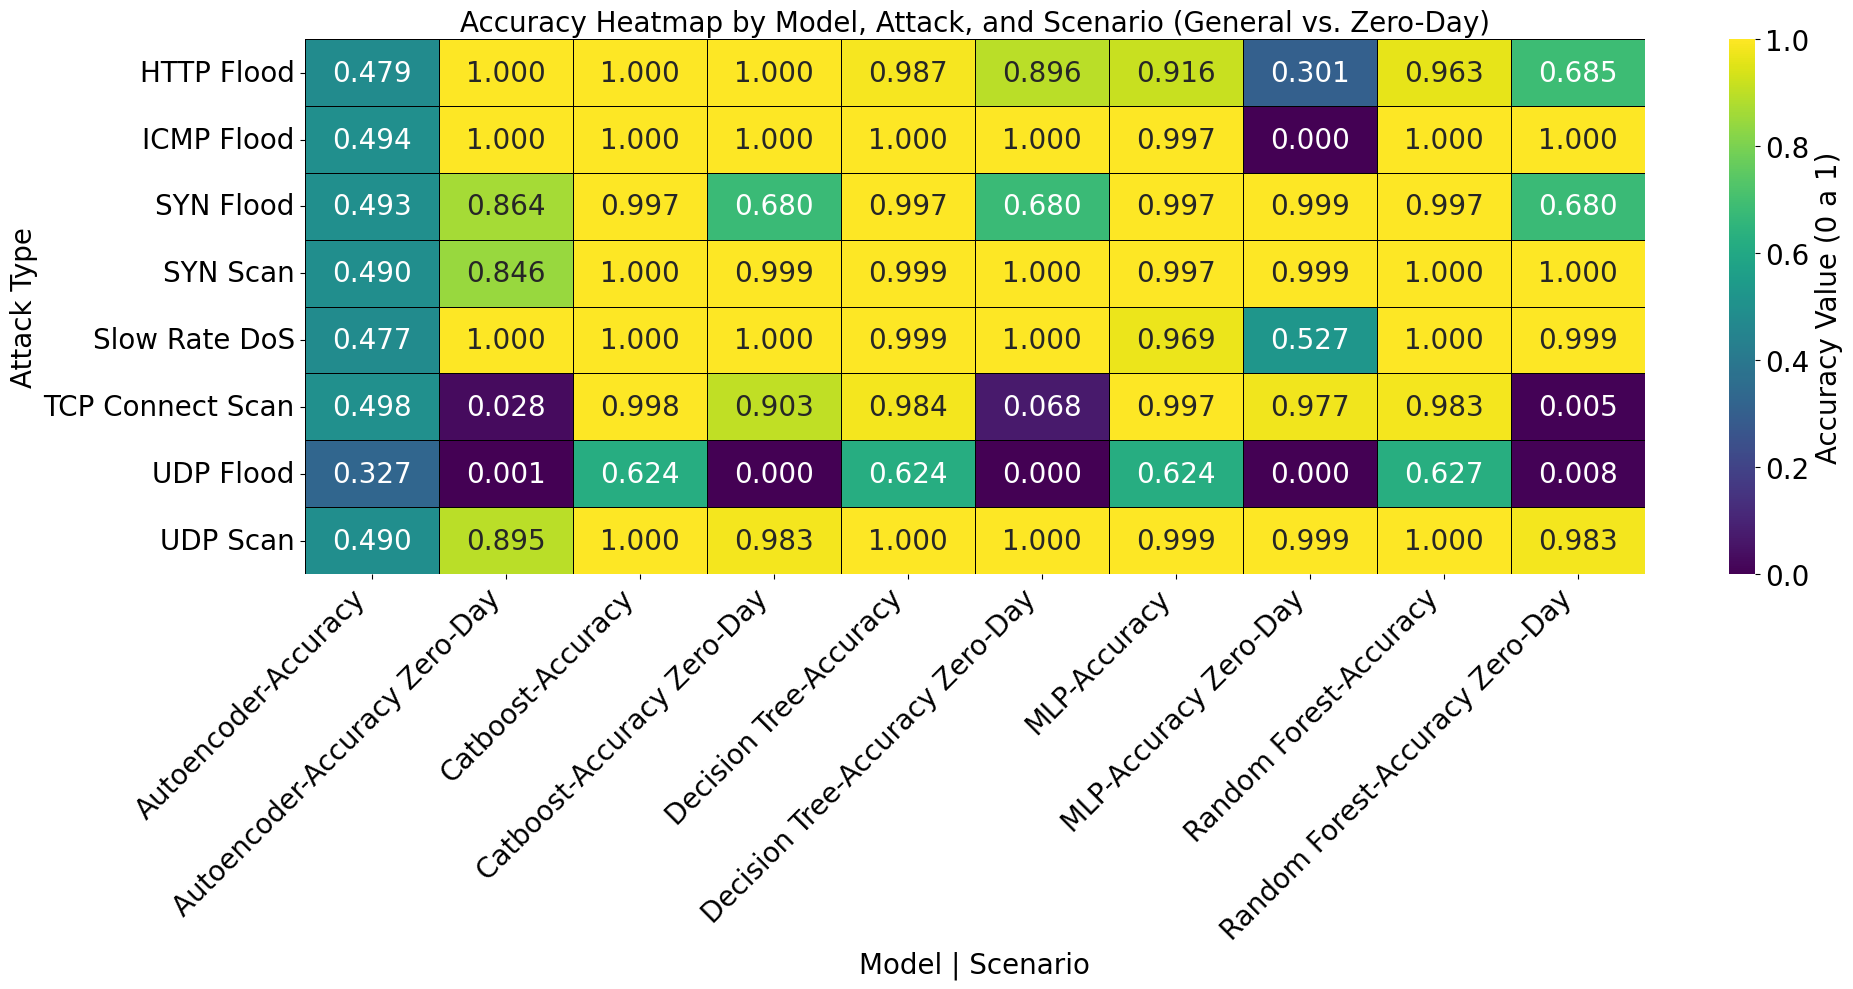

In [78]:
plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot,
    annot=True,
    fmt=".3f",
    cmap="viridis",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Accuracy Value (0 a 1)'},
    annot_kws={"fontsize": 20}
)

plt.title('Accuracy Heatmap by Model, Attack, and Scenario (General vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Accuracy Value (0 a 1)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

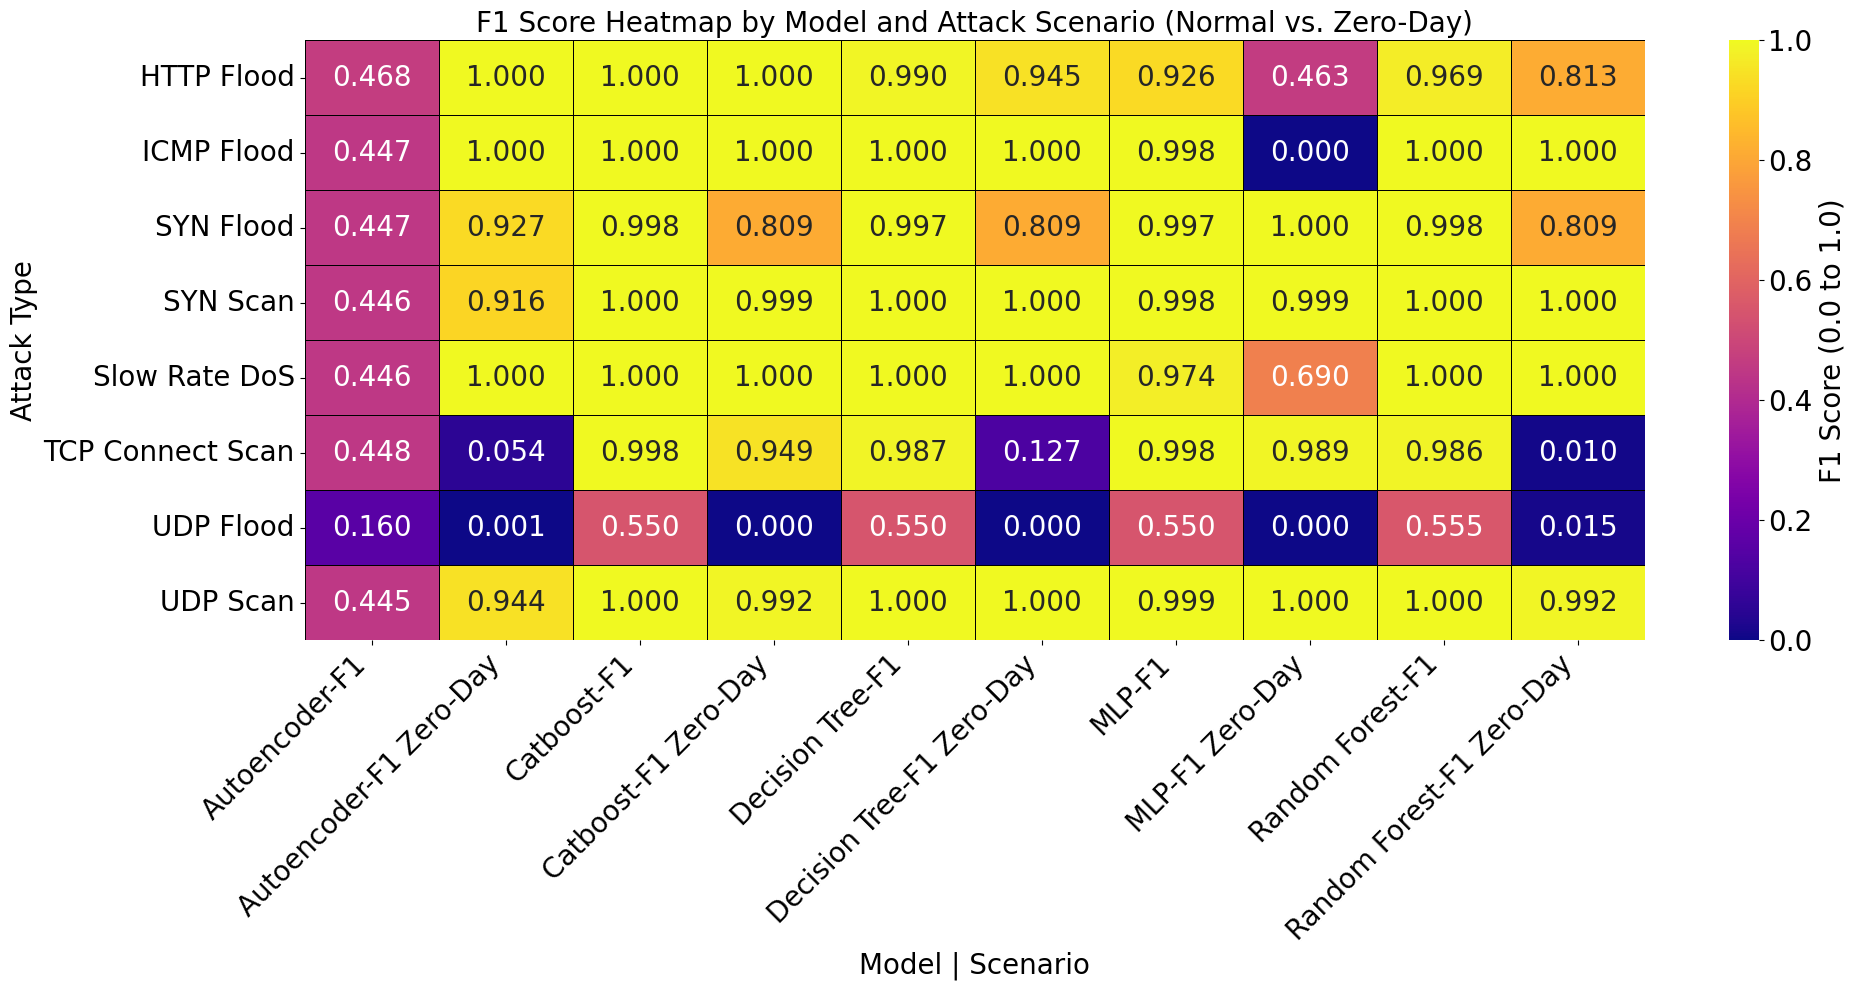

In [79]:
data_f1_heatmap = df[['Model', 'Ataque Zero-Day', 'F1', 'ZD - F1']].rename(columns={
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - F1': 'F1 Zero-Day'
})

df_melted_f1 = data_f1_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['F1', 'F1 Zero-Day'],
    var_name='Scenario',
    value_name='F1 Score'
)

df_pivot_f1 = df_melted_f1.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='F1 Score'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_f1,
    annot=True,
    fmt=".3f",
    cmap="plasma",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'F1 Score (0.0 to 1.0)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('F1 Score (0.0 to 1.0)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.title('F1 Score Heatmap by Model and Attack Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

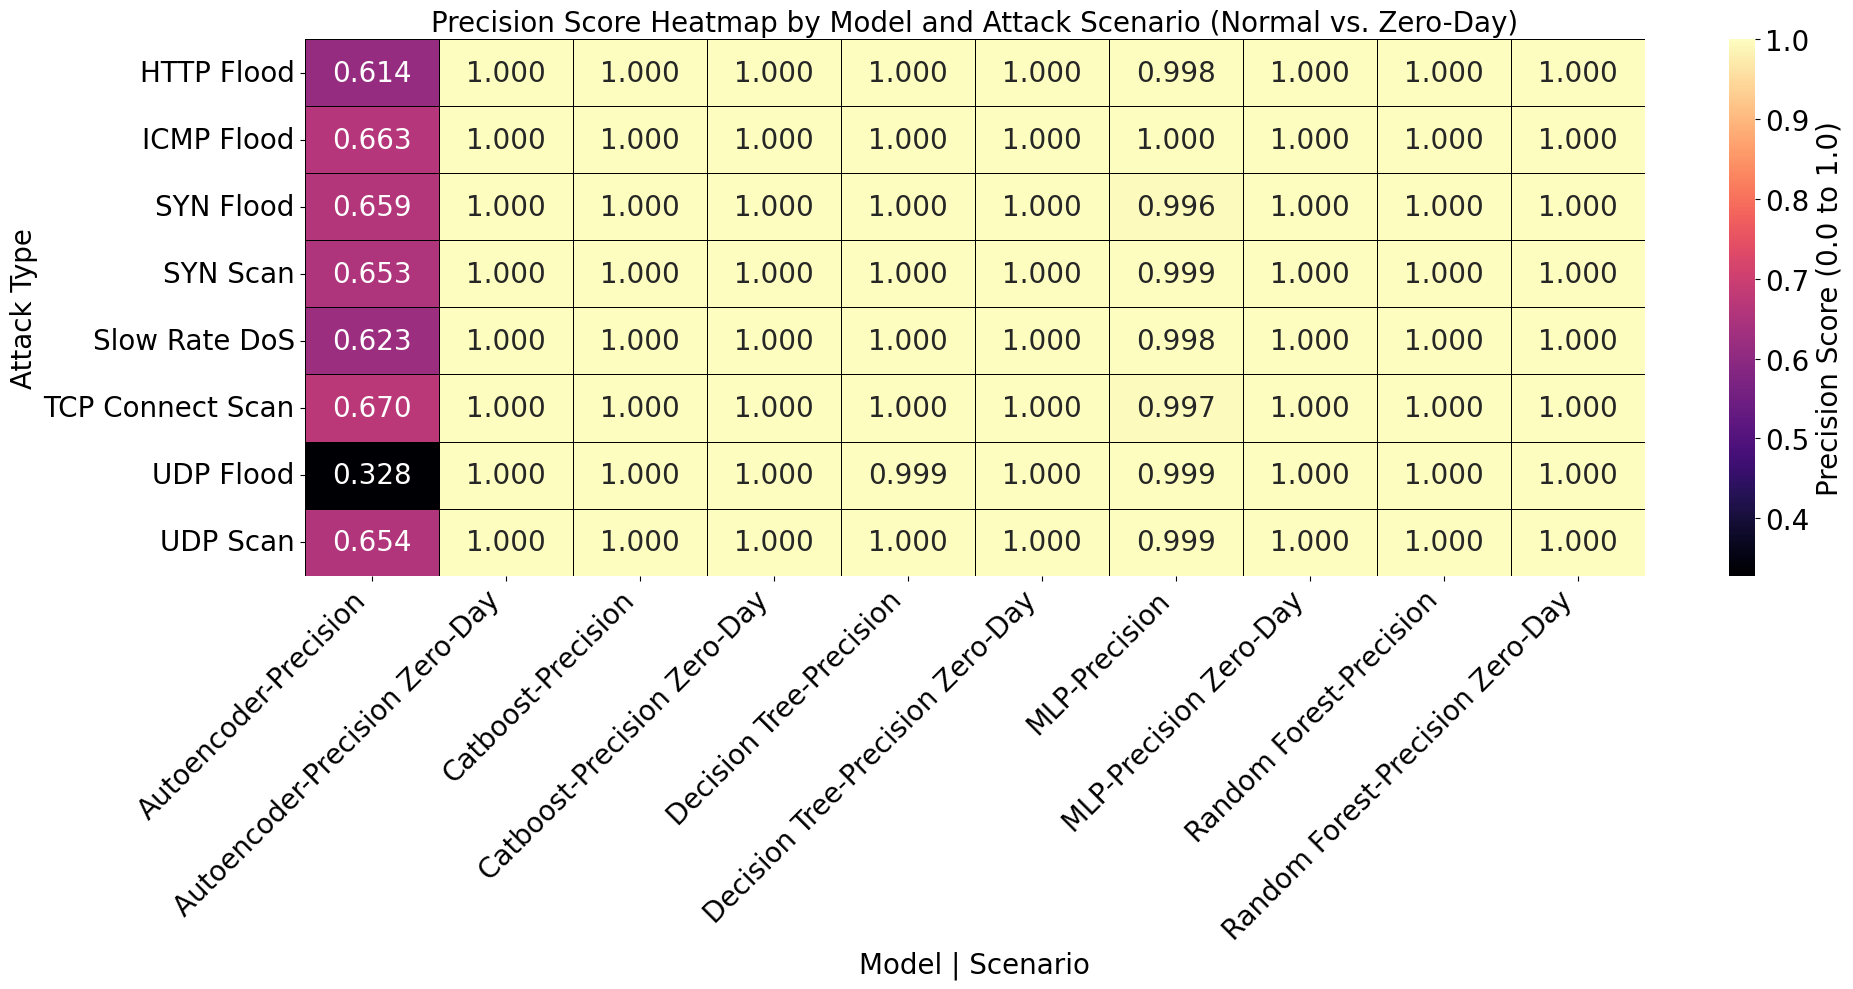

In [80]:
data_precision_heatmap = df[['Model', 'Ataque Zero-Day', 'Precision', 'ZD - Precision']].rename(columns={
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Precision': 'Precision Zero-Day'
})

df_melted_precision = data_precision_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Precision', 'Precision Zero-Day'],
    var_name='Scenario',
    value_name='Precision Score'
)

df_pivot_precision = df_melted_precision.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Precision Score'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_precision,
    annot=True,
    fmt=".3f",
    cmap="magma",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Precision Score (0.0 to 1.0)'},
    annot_kws={"fontsize": 20}
)


plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Precision Score (0.0 to 1.0)', fontsize=20)

cbar.ax.tick_params(labelsize=20)


plt.title('Precision Score Heatmap by Model and Attack Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

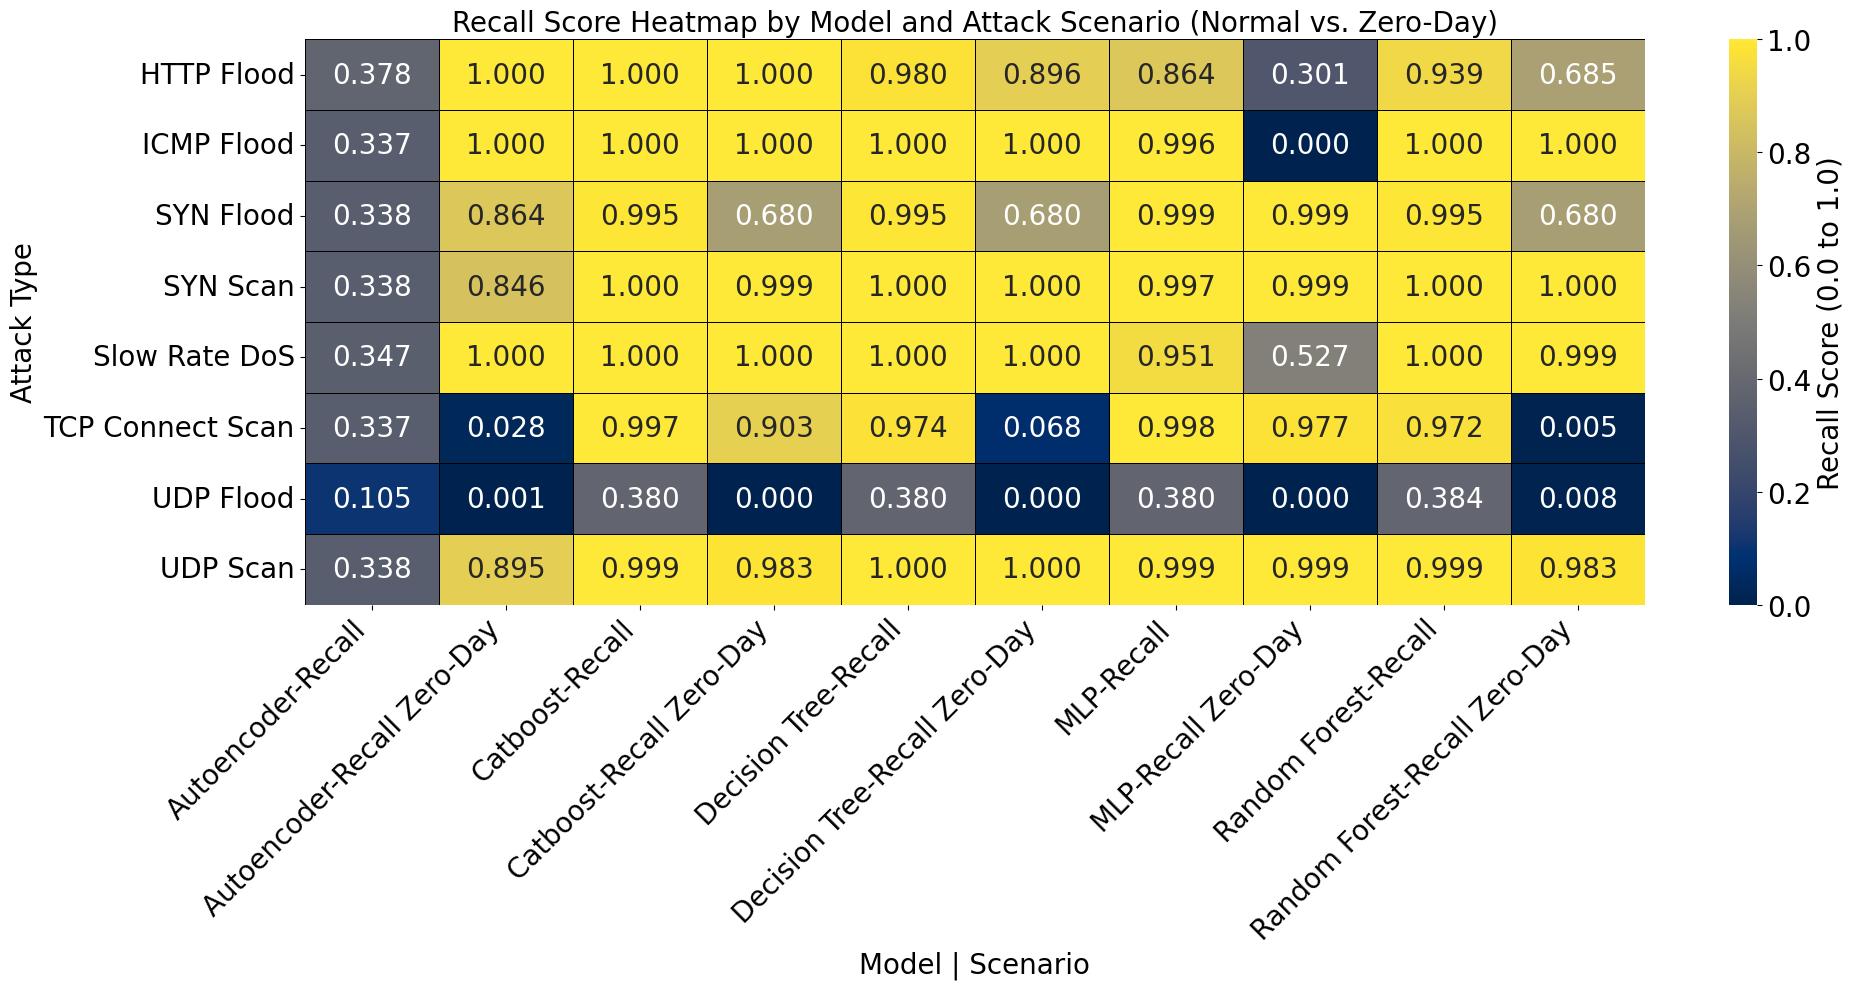

In [81]:
data_recall_heatmap = df[['Model', 'Ataque Zero-Day', 'Recall', 'ZD - Recall']].rename(columns={
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Recall': 'Recall Zero-Day'
})

df_melted_recall = data_recall_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Recall', 'Recall Zero-Day'],
    var_name='Scenario',
    value_name='Recall Score'
)

df_pivot_recall = df_melted_recall.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Recall Score'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_recall,
    annot=True,
    fmt=".3f",
    cmap="cividis",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Recall Score (0.0 to 1.0)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Recall Score (0.0 to 1.0)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.title('Recall Score Heatmap by Model and Attack Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# CPU

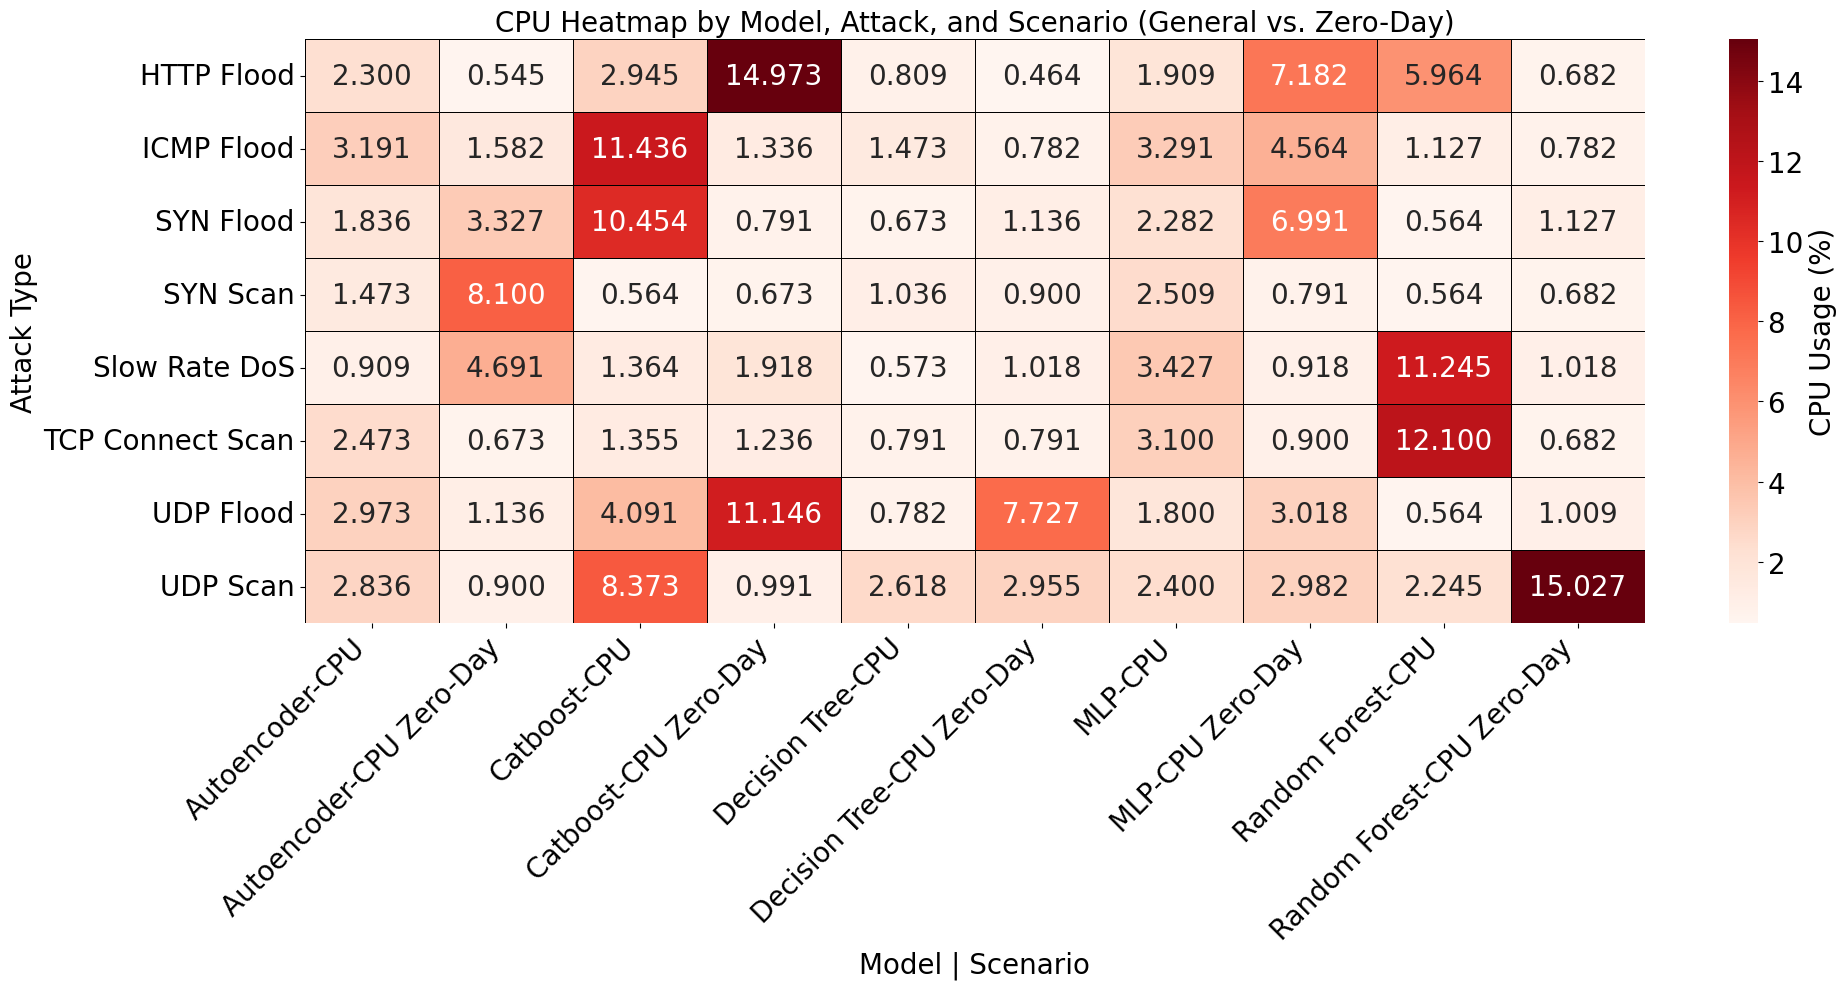

In [82]:
data_cpu_heatmap = df[['Model', 'Ataque Zero-Day', 'CPU', 'ZD - CPU']]
data_cpu_heatmap = data_cpu_heatmap.rename(columns={'ZD - CPU': 'CPU Zero-Day', 'Ataque Zero-Day': 'Attack Zero-Day'})

df_melted_cpu = data_cpu_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['CPU', 'CPU Zero-Day'],
    var_name='Scenario',
    value_name='Uso de CPU'
)

df_pivot_cpu = df_melted_cpu.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Uso de CPU'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_cpu,
    annot=True,
    fmt=".3f",
    cmap="Reds",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'CPU Usage (%)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('CPU Usage (%)', fontsize=20)

cbar.ax.tick_params(labelsize=20)


plt.title('CPU Heatmap by Model, Attack, and Scenario (General vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Memory

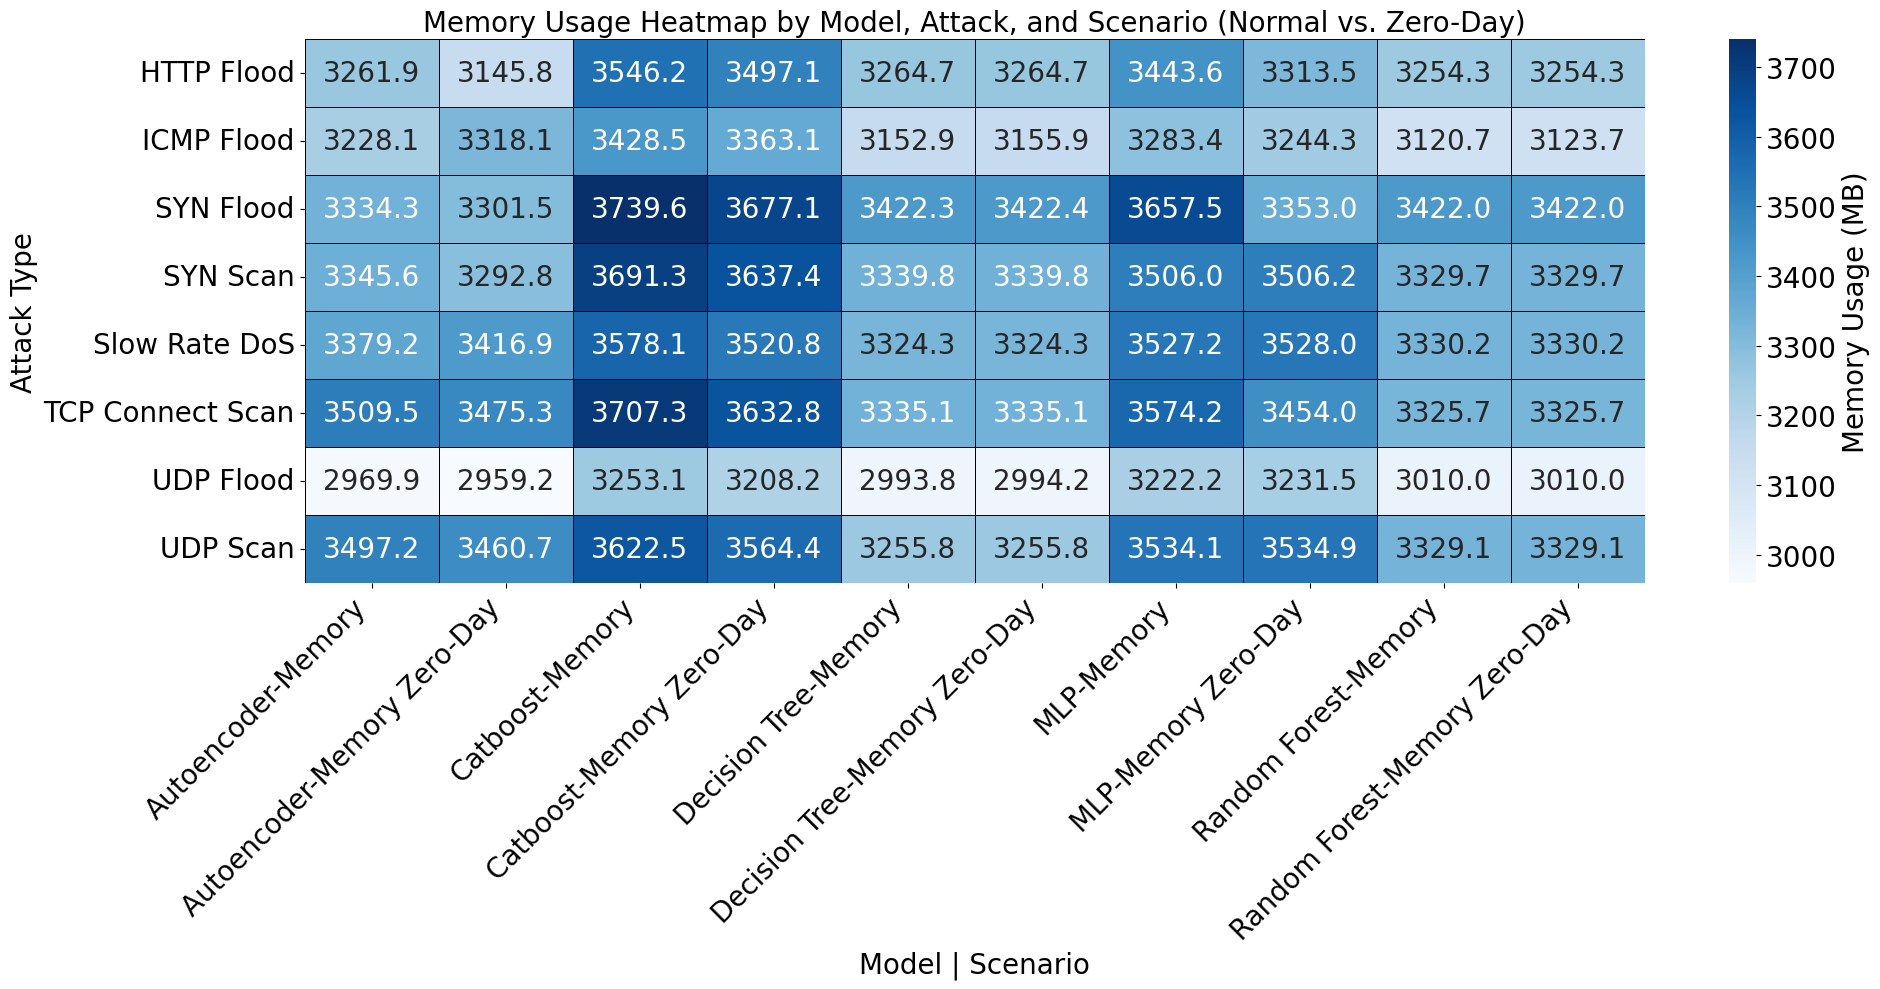

In [83]:
data_memory_heatmap = df[['Model', 'Ataque Zero-Day', 'Memory', 'ZD - Memory']]

data_memory_heatmap = data_memory_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Memory': 'Memory Zero-Day'
})

df_melted_memory = data_memory_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Memory', 'Memory Zero-Day'],
    var_name='Scenario',
    value_name='Memory Usage (MB)'
)

df_pivot_memory = df_melted_memory.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Memory Usage (MB)'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_memory,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Memory Usage (MB)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Memory Usage (MB)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.title('Memory Usage Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Energy

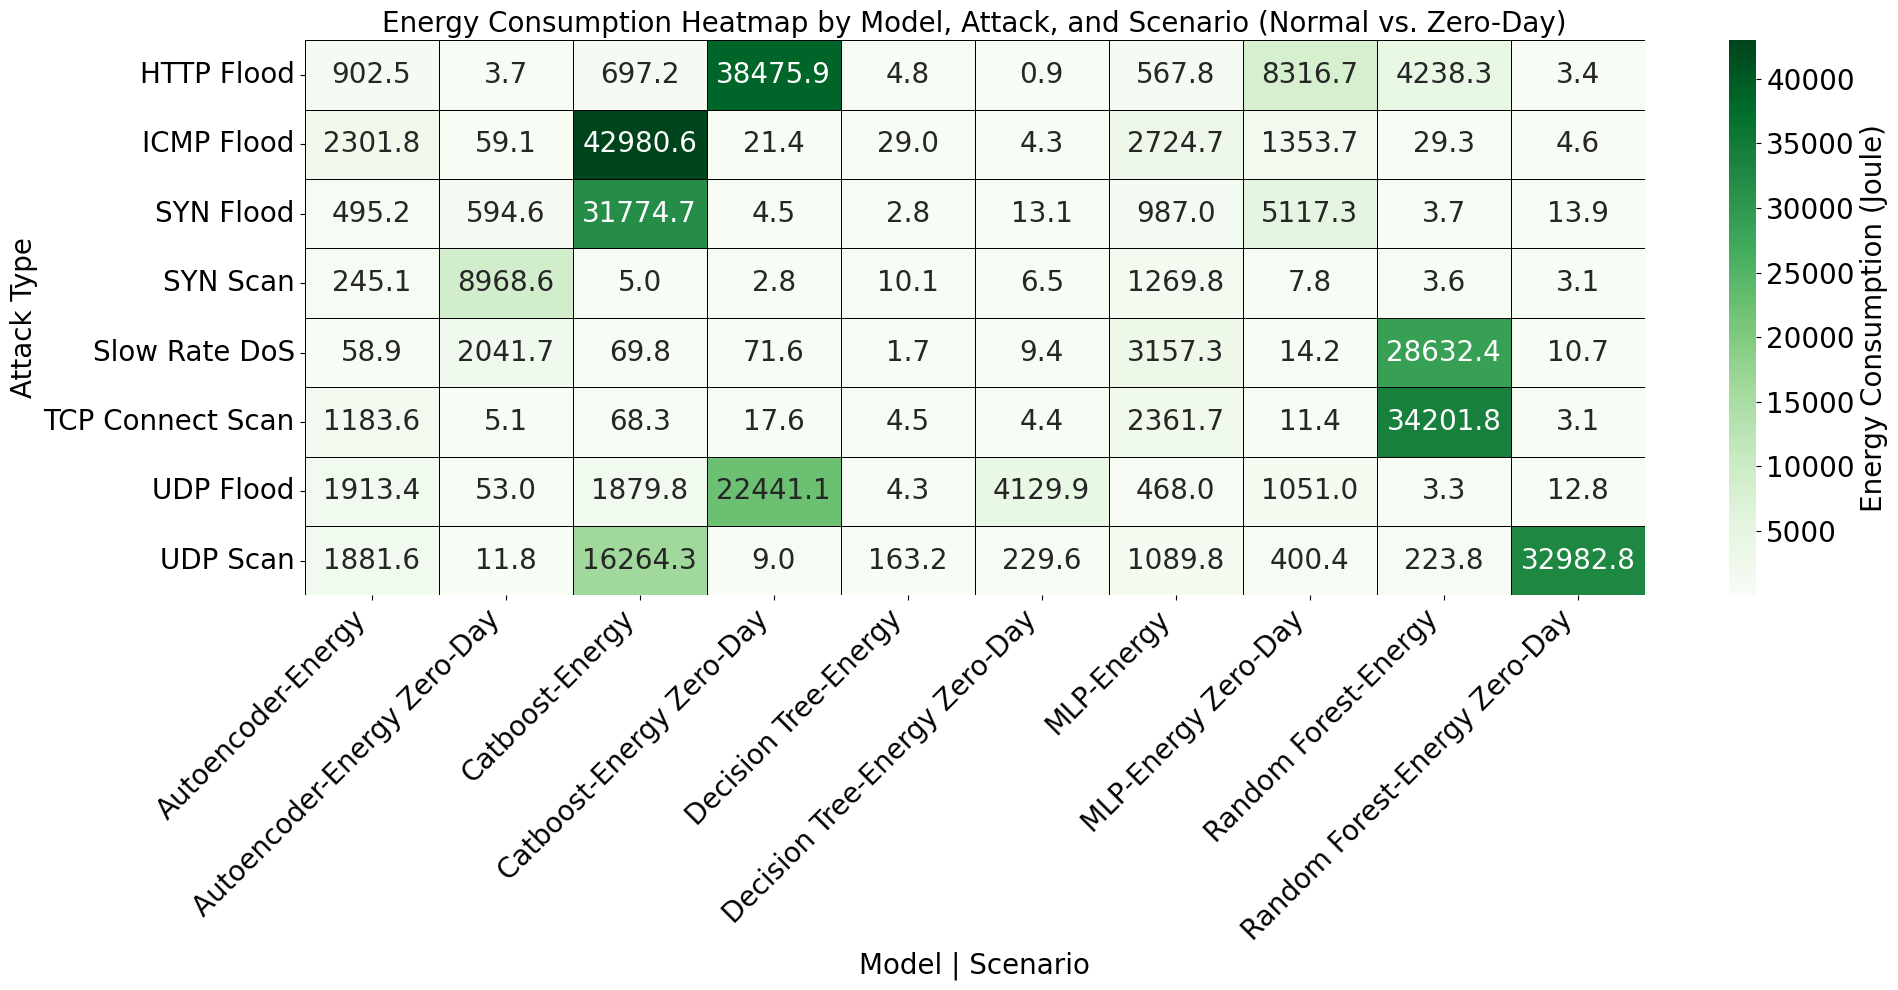

In [84]:
data_energy_heatmap = df[['Model', 'Ataque Zero-Day', 'Energy', 'ZD - Energy']]

data_energy_heatmap = data_energy_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Energy': 'Energy Zero-Day'
})

df_melted_energy = data_energy_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Energy', 'Energy Zero-Day'],
    var_name='Scenario',
    value_name='Energy Consumption'
)

df_pivot_energy = df_melted_energy.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Energy Consumption'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_energy,
    annot=True,
    fmt=".1f",
    cmap="Greens",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Energy Consumption (Joule)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Energy Consumption (Joule)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.title('Energy Consumption Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Time

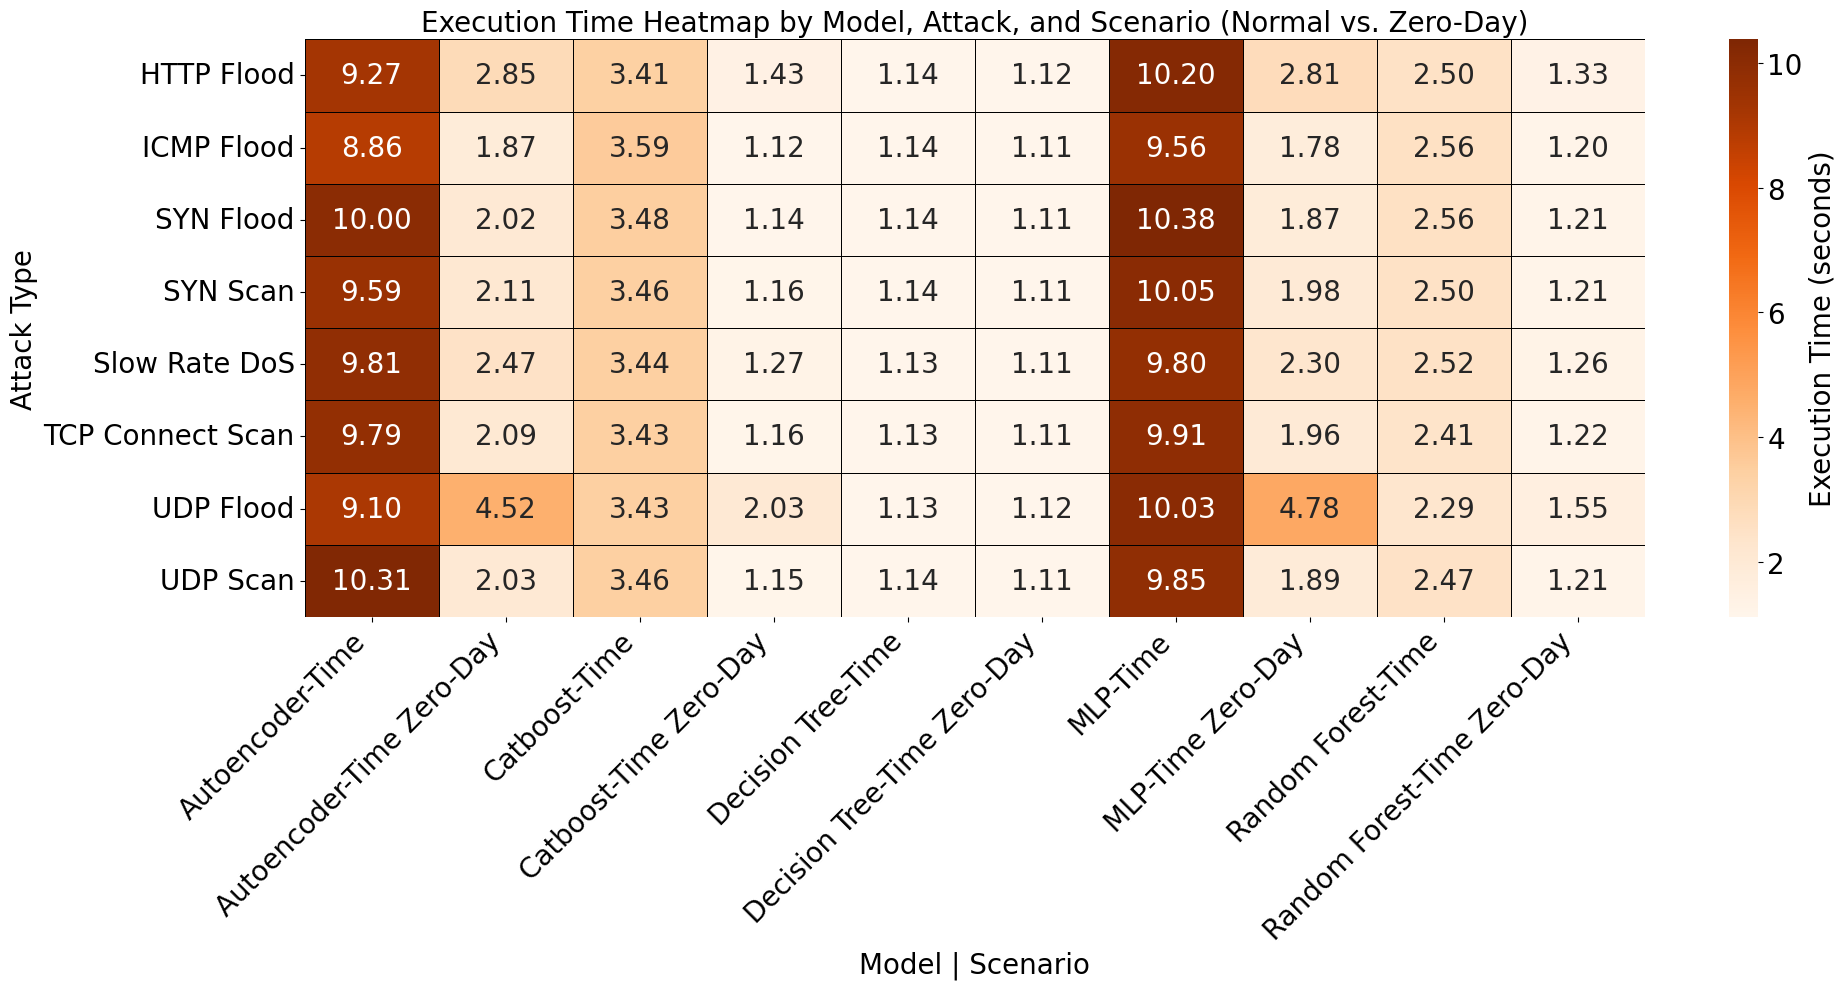

In [85]:
data_time_heatmap = df[['Model', 'Ataque Zero-Day', 'Time', 'ZD - Time']]

data_time_heatmap = data_time_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Time': 'Time Zero-Day'
})

df_melted_time = data_time_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Time', 'Time Zero-Day'],
    var_name='Scenario',
    value_name='Execution Time (s)'
)

df_pivot_time = df_melted_time.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Execution Time (s)'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_time,
    annot=True,
    fmt=".2f",
    cmap="Oranges",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Execution Time (seconds)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Execution Time (seconds)', fontsize=20)

cbar.ax.tick_params(labelsize=20)
plt.title('Execution Time Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Barras

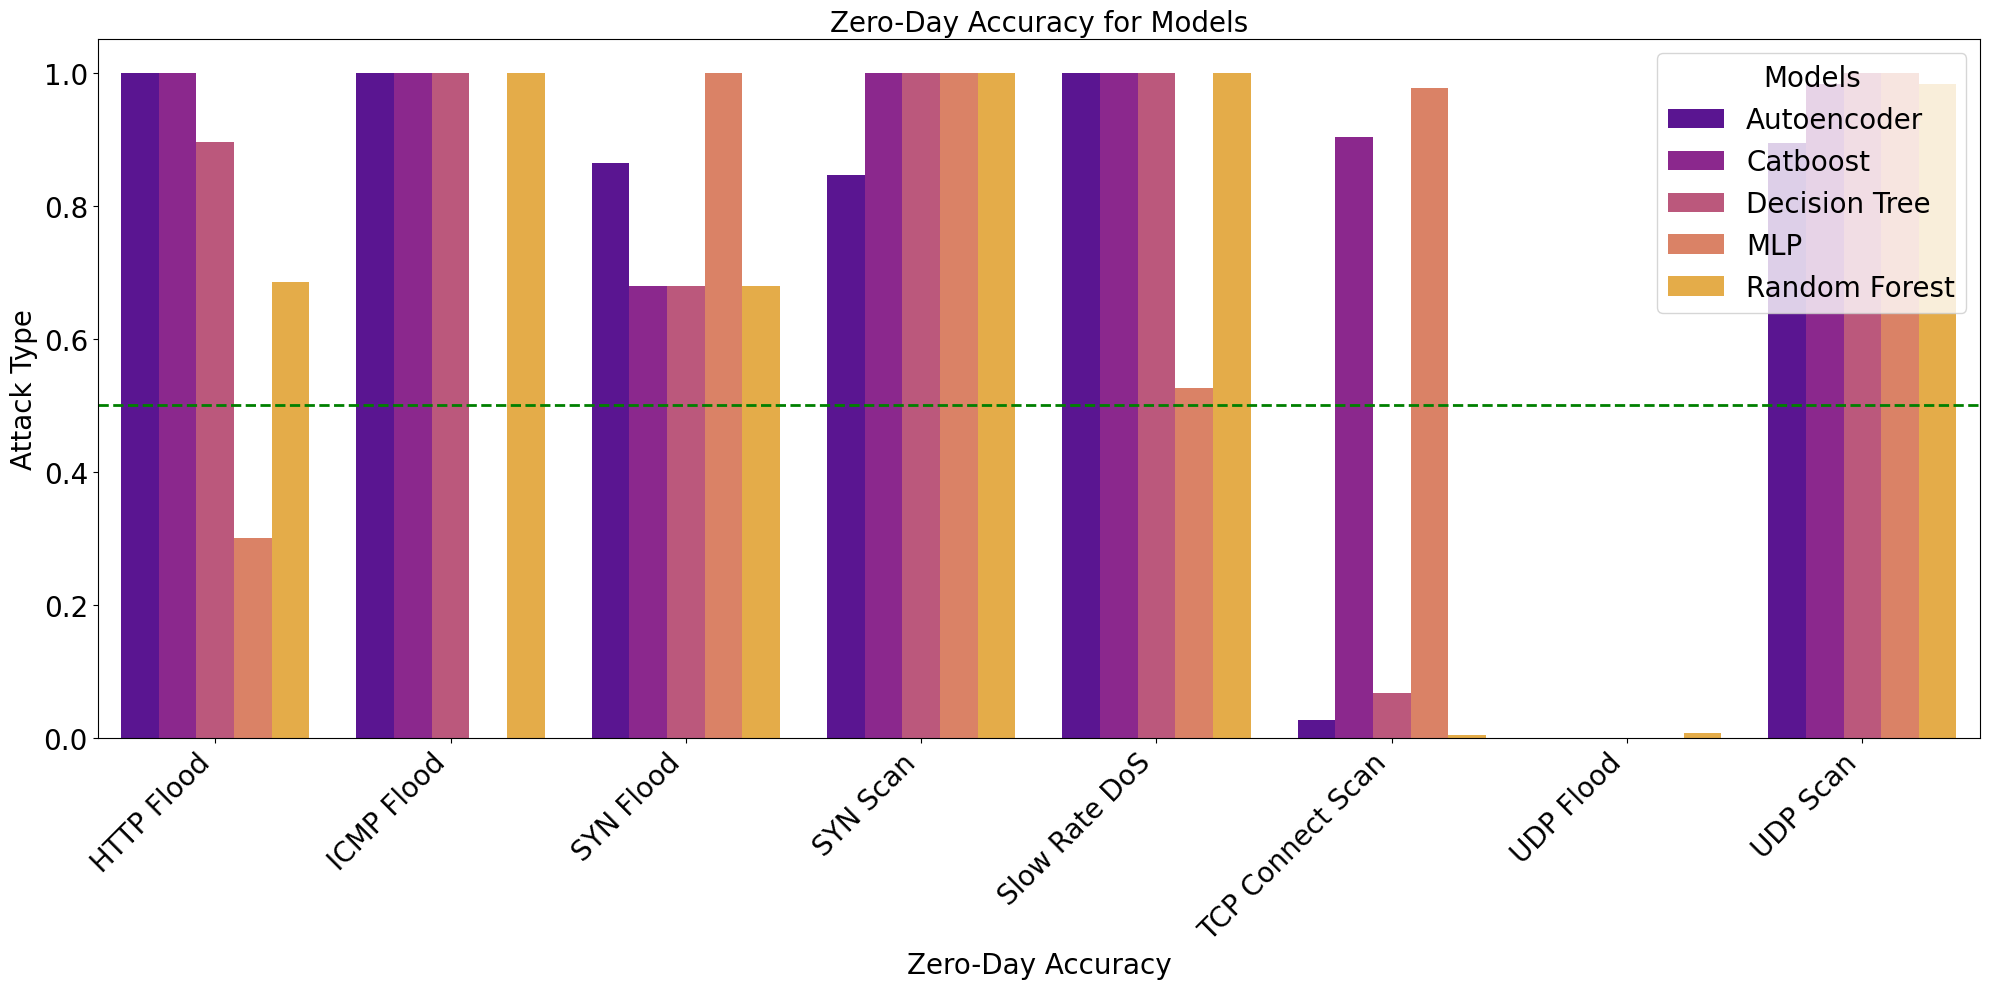

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_accuracy_zd = df[['Model', 'Ataque Zero-Day', 'ZD - Accuracy']]

df_plot = df_accuracy_zd.groupby(['Ataque Zero-Day', 'Model'])['ZD - Accuracy'].mean().reset_index()

plt.figure(figsize=(20, 10))

sns.barplot(
    x='Ataque Zero-Day',
    y='ZD - Accuracy',
    hue='Model',
    data=df_plot,
    palette='plasma'
)

plt.title('Zero-Day Accuracy for Models', fontsize=20)
plt.xlabel('Zero-Day Accuracy', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.axhline(y=0.5, color='green', linestyle='--', linewidth=2)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.legend(
    title='Models',
    loc='upper right',
    fontsize=20,
    title_fontsize=20
)

plt.tight_layout()
plt.show()

In [87]:
df_train_string = '''
Model,attack,total_time_train,avg_cpu_train,avg_mem_train,energy_train
Decision Tree,ICMPFlood,9.08841,49.95,3130.22,9061170.0
Decision Tree,UDPFlood,6.97851,49.95,2988.01,6957600.0
Decision Tree,SYNFlood,8.94428,50.0,3422.33,8944280.0
Decision Tree,SYNScan,9.10166,49.95,3339.81,9074380.0
Decision Tree,HTTPFlood,7.16761,49.75,3264.66,7060630.0
Decision Tree,UDPScan,11.8248,50.0,3255.81,11824800.0
Decision Tree,TCPConnectScan,8.8405,50.0,3335.09,8840500.0
Decision Tree,SlowrateDoS,8.66296,50.0,3324.33,8662960.0
Random Forest,ICMPFlood,140.608,49.95,3102.72,140187000.0
Random Forest,UDPFlood,94.1844,49.9,2995.44,93620400.0
Random Forest,SYNFlood,156.284,49.9,3421.97,155348000.0
Random Forest,SYNScan,134.99,49.7,3329.73,132575000.0
Random Forest,HTTPFlood,100.147,49.9,3254.34,99547700.0
Random Forest,UDPScan,136.851,49.95,3329.04,136441000.0
Random Forest,TCPConnectScan,129.417,49.85,3325.66,128256000.0
Random Forest,SlowrateDoS,115.615,49.95,3330.21,115269000.0
Catboost,ICMPFlood,46.9391,364.55,3255.87,18192700000.0
Catboost,UDPFlood,30.0804,369.55,3247.22,12144900000.0
Catboost,SYNFlood,46.5684,367.65,3684.73,18513300000.0
Catboost,SYNScan,44.9955,369.25,3651.77,18122600000.0
Catboost,HTTPFlood,37.2996,366.35,3548.13,14671800000.0
Catboost,UDPScan,44.0297,370.0,3589.87,17841900000.0
Catboost,TCPConnectScan,45.1452,369.3,3646.62,18190300000.0
Catboost,SlowrateDoS,41.8882,368.7,3535.74,16795800000.0
MLP,ICMPFlood,219.89,1.245,3477.4,3394.71
MLP,UDPFlood,150.84,1.56,3214.05,4581.21
MLP,SYNFlood,109.886,0.5,3588.05,109.886
MLP,SYNScan,110.636,0.25,3633.24,13.8295
MLP,HTTPFlood,93.9596,2.8,3506.46,16500.8
MLP,UDPScan,105.671,2.95,3730.24,21702.7
MLP,TCPConnectScan,107.1,0.63,3709.81,214.241
MLP,SlowrateDoS,101.682,1.87,3707.1,5319.33
Autoencoder,ICMPFlood,267.063,2.89167,2847.96,51659.3
Autoencoder,UDPFlood,213.499,1.8225,2872.94,10339.2
Autoencoder,SYNFlood,84.2763,0.51,3369.26,89.4347
Autoencoder,SYNScan,88.0945,0.38,3516.84,38.6714
Autoencoder,HTTPFlood,72.9844,4.6,3396.27,56832.1
Autoencoder,UDPScan,87.0829,3.53,3636.1,30644.1
Autoencoder,TCPConnectScan,87.4253,6.69,3687.86,209414.0
Autoencoder,SlowrateDoS,81.7727,3.76,3629.91,34774.6
'''

In [88]:
# --- 1. Carregar os Dados ---
df_train = pd.read_csv(io.StringIO(df_train_string))
df_test = pd.read_csv(io.StringIO(df_test))

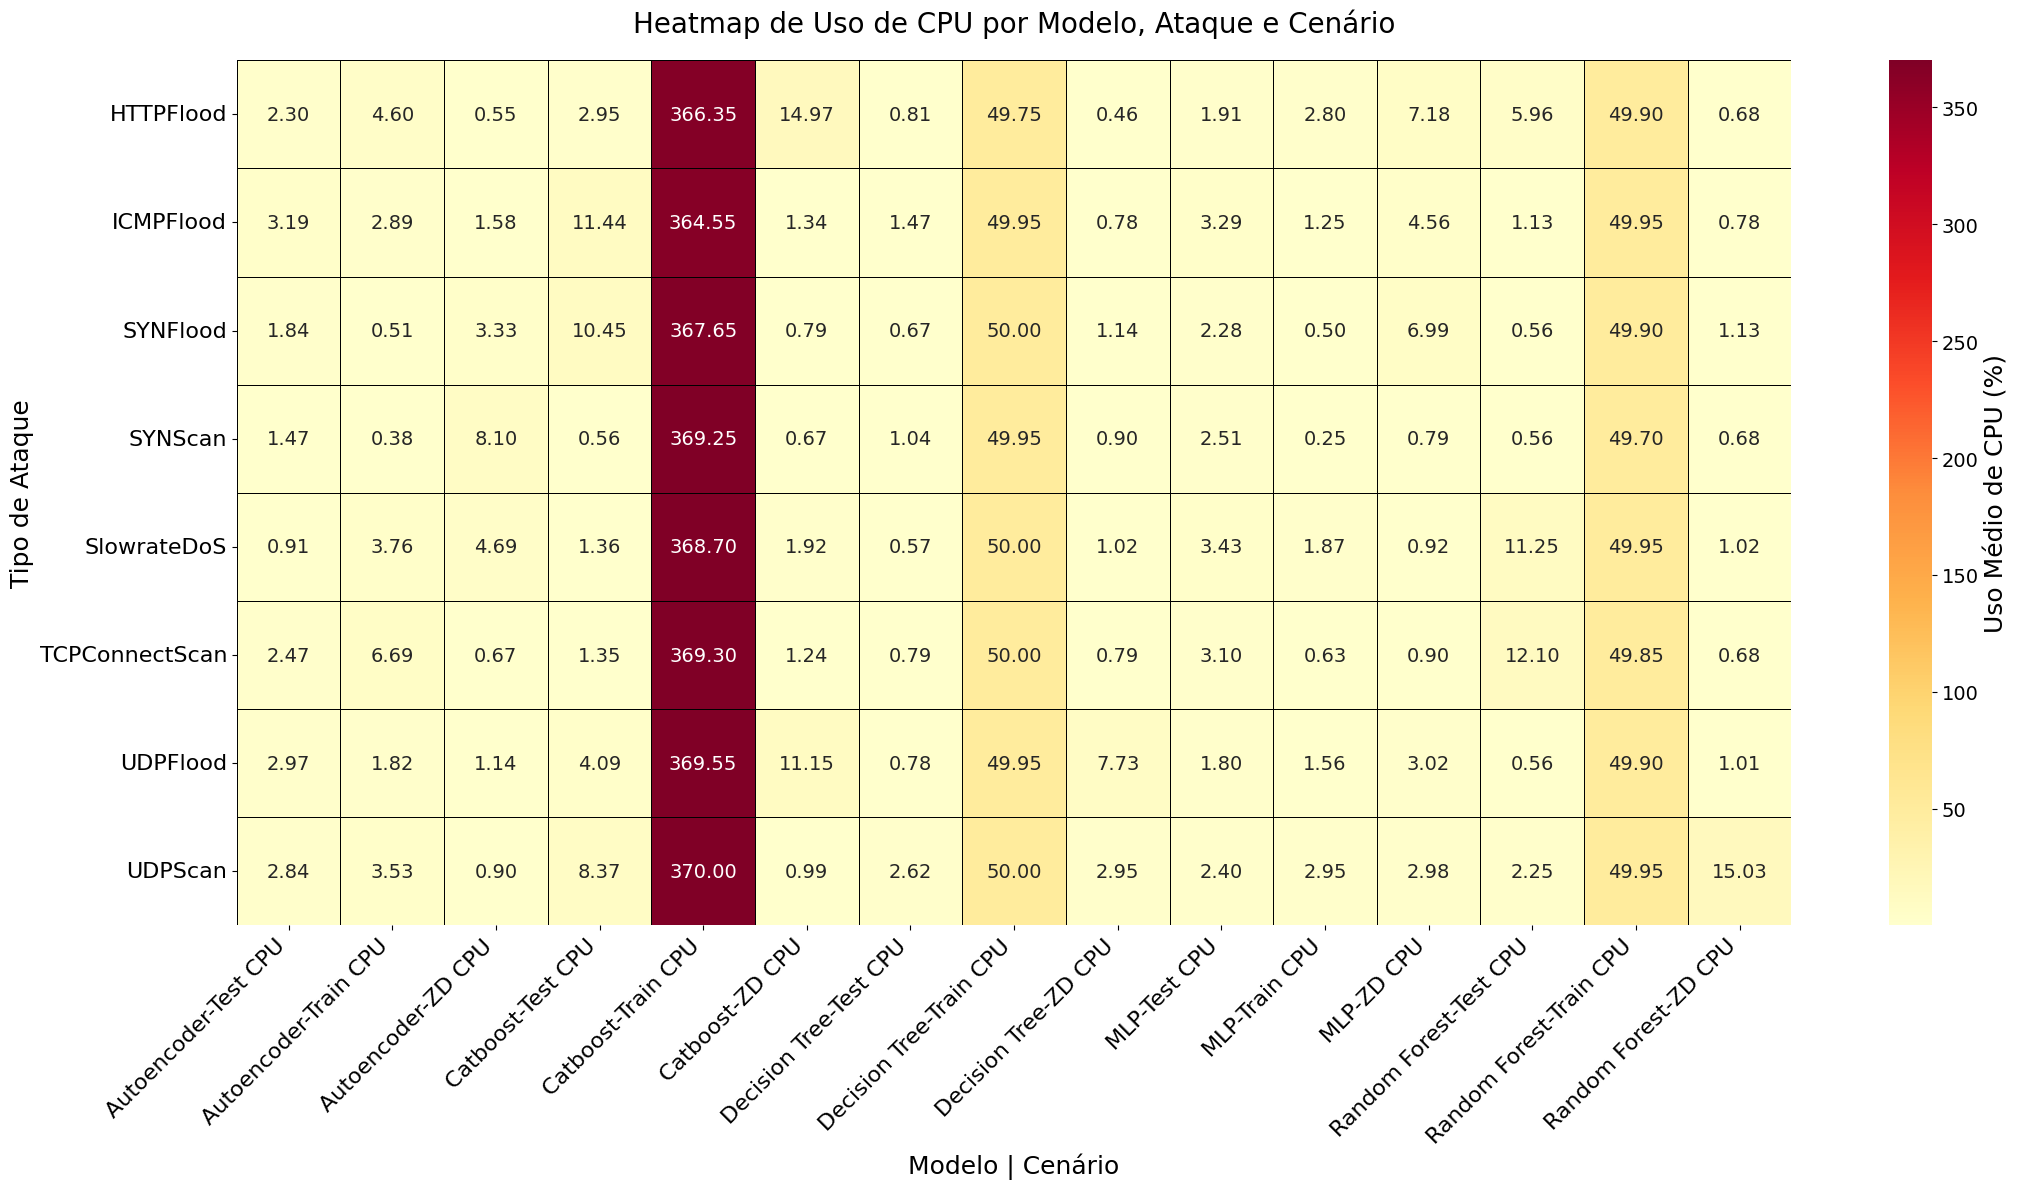

In [89]:

# --- 2. Preparação dos Dados ---
# Selecionar e renomear colunas do DataFrame de Treinamento
df_cpu_train = df_train[['Model', 'attack', 'avg_cpu_train']].rename(
    columns={'attack': 'Attack', 'avg_cpu_train': 'Train CPU'}
)

# Selecionar e renomear colunas do DataFrame de Teste
df_cpu_test = df_test[['Model', 'Ataque Zero-Day', 'CPU', 'ZD - CPU']].rename(
    columns={'Ataque Zero-Day': 'Attack', 'CPU': 'Test CPU', 'ZD - CPU': 'ZD CPU'}
)

# Mesclar os DataFrames
df_cpu_combined = pd.merge(df_cpu_train, df_cpu_test, on=['Model', 'Attack'])

# Derreter (Melt) o DataFrame para ter o formato longo
df_melted_cpu = df_cpu_combined.melt(
    id_vars=['Model', 'Attack'],
    value_vars=['Train CPU', 'Test CPU', 'ZD CPU'],
    var_name='Scenario',
    value_name='CPU Usage (%)'
)

# Pivotar para o formato do Heatmap (Attack vs. Model | Scenario)
df_pivot_cpu = df_melted_cpu.pivot_table(
    index='Attack',
    columns=['Model', 'Scenario'],
    values='CPU Usage (%)',
    aggfunc='mean'
)

# --- 3. Geração do Heatmap ---
plt.figure(figsize=(22, 12)) # Aumentei o tamanho para acomodar 15 colunas

ax = sns.heatmap(
    df_pivot_cpu,
    annot=True,
    fmt=".2f", # Formato de duas casas decimais
    cmap="YlOrRd", # Paleta de cores quente (amarelo-laranja-vermelho) para CPU
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Uso Médio de CPU (%)'},
    annot_kws={"fontsize": 14}
)

# Estilização
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)

# Ajuste do Label da Barra de Cor
cbar = ax.collections[0].colorbar
cbar.set_label('Uso Médio de CPU (%)', fontsize=18)
cbar.ax.tick_params(labelsize=14)

# Títulos e Labels
plt.title('Heatmap de Uso de CPU por Modelo, Ataque e Cenário', fontsize=20, pad=20)
plt.xlabel('Modelo | Cenário', fontsize=18)
plt.ylabel('Tipo de Ataque', fontsize=18)

plt.tight_layout()
plt.show()